In [1]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LinDA
from sklearn.manifold import Isomap

# Dimensionality Reduction
## Live Demos
## PCA

In [5]:
iris_data, iris_types = load_iris().data, load_iris().target

In [19]:
iris_data = MinMaxScaler((0, 1)).fit_transform(iris_data)

In [20]:
iris_data.min(axis = 0), iris_data.max(axis = 0), 

(array([0., 0., 0., 0.]), array([1., 1., 1., 1.]))

In [21]:
pca = PCA()

In [22]:
pca.fit(iris_data)

PCA()

In [24]:
iris_data_pca = pca.transform(iris_data)

In [25]:
iris_data_pca.shape

(150, 4)

In [26]:
pca.explained_variance_ratio_

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

In [27]:
np.cumsum(pca.explained_variance_ratio_)

array([0.84136038, 0.95887846, 0.99361408, 1.        ])

In [28]:
iris_data_pca[:, :2]

array([[-6.30702931e-01,  1.07577910e-01],
       [-6.22904943e-01, -1.04259833e-01],
       [-6.69520395e-01, -5.14170597e-02],
       [-6.54152759e-01, -1.02884871e-01],
       [-6.48788056e-01,  1.33487576e-01],
       [-5.35272778e-01,  2.89615724e-01],
       [-6.56537790e-01,  1.07244911e-02],
       [-6.25780499e-01,  5.71335411e-02],
       [-6.75643504e-01, -2.00703283e-01],
       [-6.45644619e-01, -6.72080097e-02],
       [-5.97408238e-01,  2.17151953e-01],
       [-6.38943190e-01,  3.25988375e-02],
       [-6.61612593e-01, -1.15605495e-01],
       [-7.51967943e-01, -1.71313322e-01],
       [-6.00371589e-01,  3.80240692e-01],
       [-5.52157227e-01,  5.15255982e-01],
       [-5.77053593e-01,  2.93709492e-01],
       [-6.03799228e-01,  1.07167941e-01],
       [-5.20483461e-01,  2.87627289e-01],
       [-6.12197555e-01,  2.19140388e-01],
       [-5.57674300e-01,  1.02109180e-01],
       [-5.79012675e-01,  1.81065123e-01],
       [-7.37784662e-01,  9.05588211e-02],
       [-5.

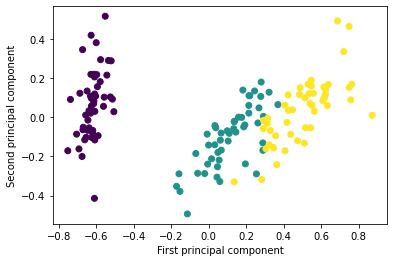

In [30]:
plt.scatter(iris_data_pca[:, 0], iris_data_pca[:, 1], c = iris_types)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [68]:
pca.components_[:, 0]

array([ 0.42494212,  0.42320271, -0.71357236, -0.36213001])

In [34]:
covariance_matrix = pd.DataFrame(iris_data).cov()

In [36]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [40]:
np.diag(eigenvalues)

array([[0.23245325, 0.        , 0.        , 0.        ],
       [0.        , 0.0324682 , 0.        , 0.        ],
       [0.        , 0.        , 0.00959685, 0.        ],
       [0.        , 0.        , 0.        , 0.00176432]])

In [39]:
eigenvectors.T

array([[ 0.42494212, -0.15074824,  0.61626702,  0.64568888],
       [-0.42320271, -0.90396711,  0.06038308,  0.00983925],
       [-0.71357236,  0.33631602, -0.0659003 ,  0.61103451],
       [ 0.36213001, -0.21681781, -0.78244872,  0.45784921]])

In [41]:
np.linalg.inv(eigenvectors.T)

array([[ 0.42494212, -0.42320271, -0.71357236,  0.36213001],
       [-0.15074824, -0.90396711,  0.33631602, -0.21681781],
       [ 0.61626702,  0.06038308, -0.0659003 , -0.78244872],
       [ 0.64568888,  0.00983925,  0.61103451,  0.45784921]])

In [46]:
np.abs(pca.inverse_transform(iris_data_pca) - iris_data_pca).mean(axis = 0)

array([0.43036765, 0.44055556, 0.46988605, 0.46031599])

## Manifold Learning

In [52]:
linda = LinDA(n_components = 2)

In [53]:
linda.fit(iris_data, iris_types)

LinearDiscriminantAnalysis(n_components=2)

In [54]:
iris_data_linda = linda.transform(iris_data)

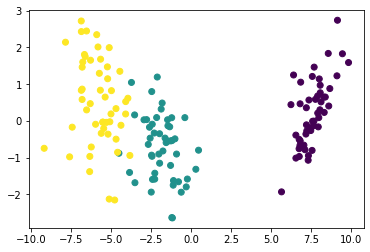

In [56]:
plt.scatter(iris_data_linda[:, 0], iris_data_linda[:, 1], c = iris_types)
plt.show()

In [62]:
isomap = Isomap(n_components = 2, n_neighbors = 10)

In [63]:
iris_isomap = isomap.fit_transform(iris_data)

In [64]:
iris_isomap.shape

(150, 2)

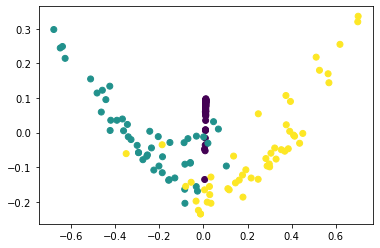

In [65]:
plt.scatter(iris_isomap[:, 0], iris_isomap[:, 1], c = iris_types)
plt.show()